In [1]:
import cv2
import os
import os.path as osp
import matplotlib.pyplot as plt
import torch
import torchvision

# ---------- set path ----------
target_path = "/opt/data/private/cv/CodeFormer/target"
root_path = "/opt/data/private/cv/CodeFormer/results/target_0.7"

cropped_path = osp.join(root_path, "cropped_faces")
restored_path = osp.join(root_path, "restored_faces")
final_path = osp.join(root_path, "final_results")

# ----------- collect images -----------
img_list = list(sorted(set(os.listdir(final_path))))

/opt/data/private/anaconda3/envs/codeformer/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def get_image_grid(images_np, nrow=8):
    """Creates a grid from a list of images by concatenating them."""
    images_torch = [torch.from_numpy(x) for x in images_np]
    torch_grid = torchvision.utils.make_grid(images_torch, nrow)

    return torch_grid.numpy()


def plot_image_grid(images_np, nrow=8, factor=1, interpolation='lanczos'):
    """Draws images in a grid
    Args:
        images_np: list of images, each image is np.array of size 3xHxW of 1xHxW
        nrow: how many images will be in one row
        factor: size if the plt.figure
        interpolation: interpolation used in plt.imshow
    """
    n_channels = max(x.shape[0] for x in images_np)
    assert (n_channels == 3) or (n_channels == 1), "images should have 1 or 3 channels"

    images_np = [x if (x.shape[0] == n_channels) else np.concatenate([x, x, x], axis=0) for x in images_np]

    grid = get_image_grid(images_np, nrow)
    plt.figure(figsize=(len(images_np) + factor, 12 + factor))

    if images_np[0].shape[0] == 1:
        plt.imshow(grid[0], cmap='gray', interpolation=interpolation)
    else:
        plt.imshow(grid.transpose(1, 2, 0), interpolation=interpolation)

    plt.show()

    return grid

<Figure size 640x480 with 0 Axes>

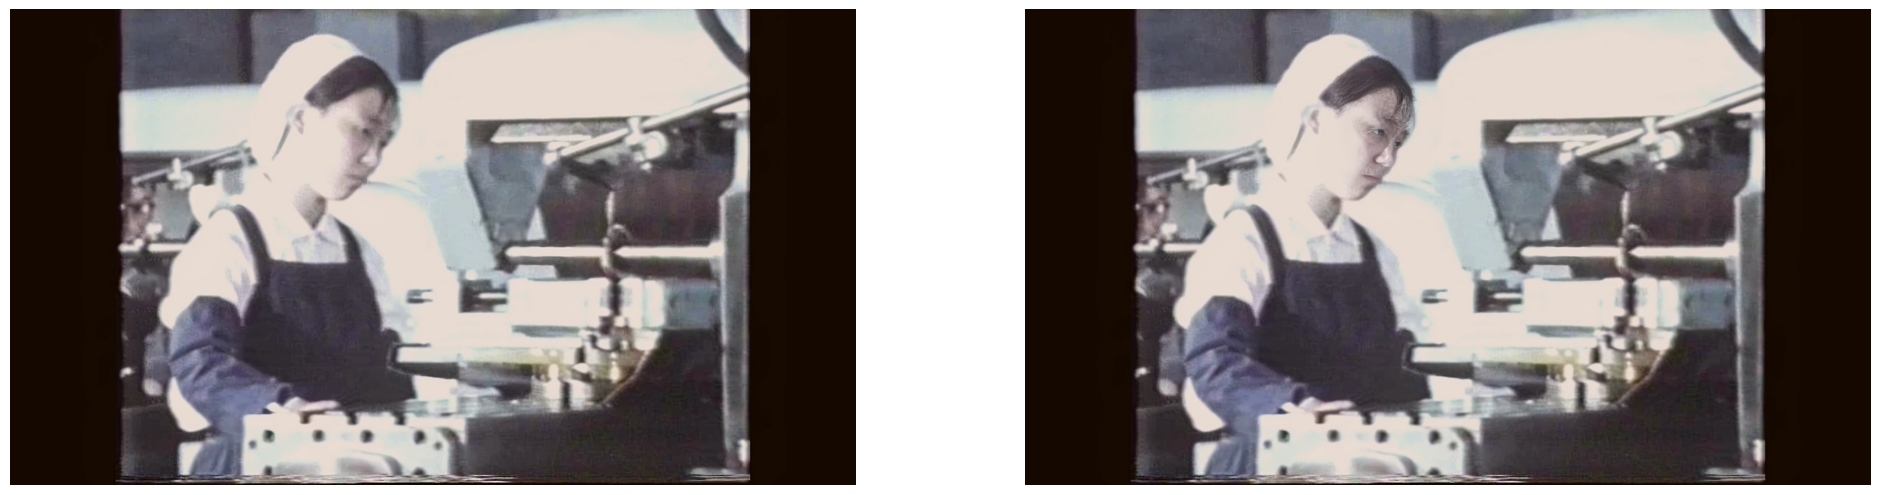

<Figure size 640x480 with 0 Axes>

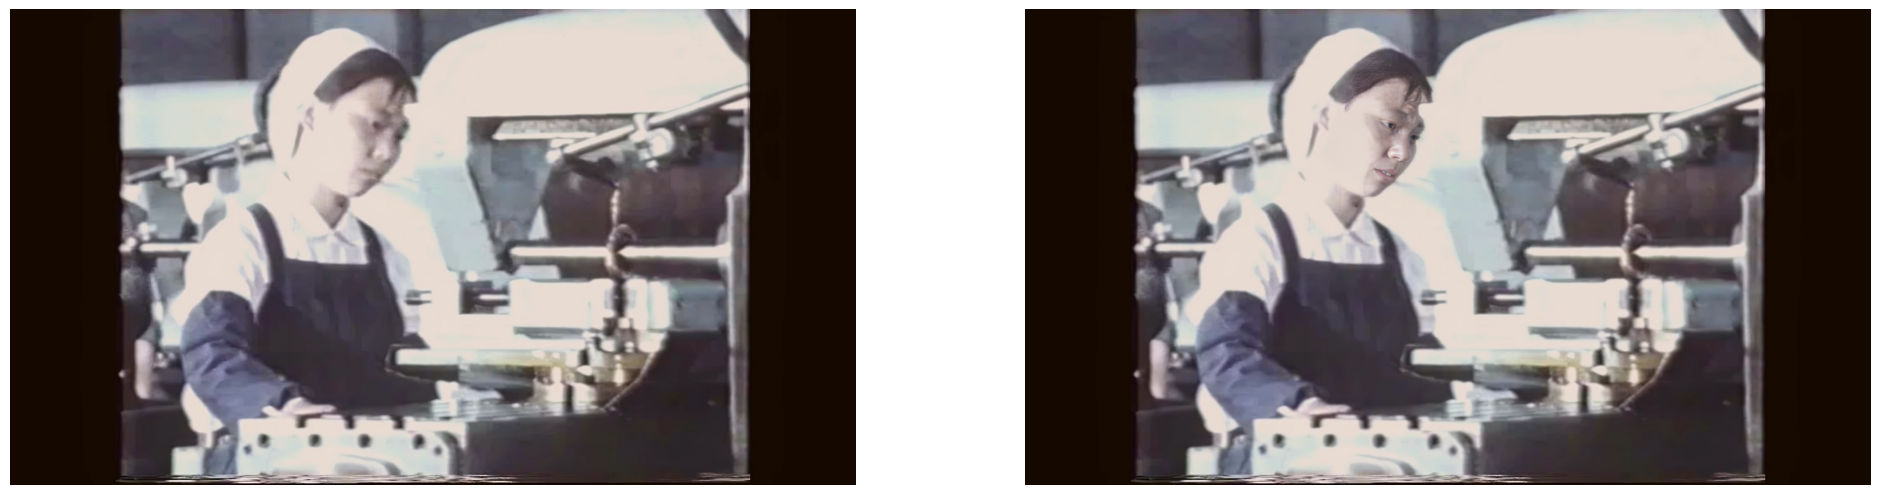

<Figure size 640x480 with 0 Axes>

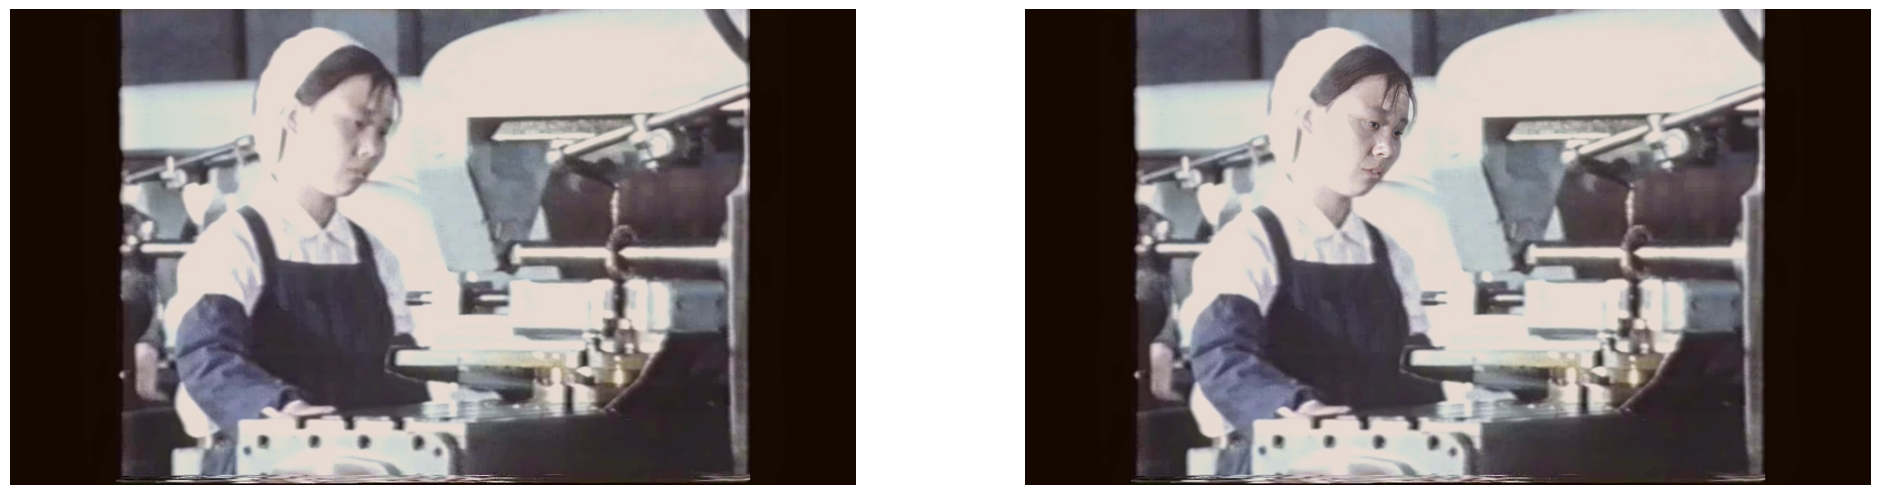

In [7]:
for img in img_list[:3]:
    # img_cropped = cv2.imread(osp.join(cropped_path, img))
    # img_restored = cv2.imread(osp.join(restored_path, img))
    img_final = cv2.imread(osp.join(final_path, img))
    img_final = cv2.cvtColor(img_final, cv2.COLOR_BGR2RGB)
    img_origin = cv2.imread(osp.join(target_path, img))
    img_origin = cv2.cvtColor(img_origin, cv2.COLOR_BGR2RGB)
    # cv2.imshow("test", img_final)

    plt.figure("Image")  # 图像窗口名称
    plt.figure(dpi=100,figsize=(24,8))
    plt.subplot(1, 2, 1)
    plt.imshow(img_origin)
    plt.axis('off')  # 关掉坐标轴为 off
    plt.subplot(1, 2, 2)
    plt.imshow(img_final)
    plt.axis('off')  # 关掉坐标轴为 off
    # plt.title('image')  # 图像题目
    plt.show()

    # img_final = img_final.transpose(2, 0, 1)
    # img_origin = img_origin.transpose(2, 0, 1)
    # plot_image_grid([img_origin, img_final], nrow=2, factor=100)